Category
PRODUCTIVITY     424
SOCIAL           295
ENTERTAINMENT    149
Name: count, dtype: int64

Type,Free,Paid
Category,,
ENTERTAINMENT,147,2
PRODUCTIVITY,396,28
SOCIAL,292,3


,App,Category,Price
995,My Talking Pet,ENTERTAINMENT,4.99
6692,cronometra-br,PRODUCTIVITY,154.99
5307,Ak Parti Yardım Toplama,SOCIAL,13.99


,App,Category,Price
855,Netflix,ENTERTAINMENT,0.0
3450,Microsoft Word,PRODUCTIVITY,0.0
2544,Facebook,SOCIAL,0.0


,App,Category,Price
6692,cronometra-br,PRODUCTIVITY,154.99
5307,Ak Parti Yardım Toplama,SOCIAL,13.99
8211,ACCDB MDB DB Manager Pro - Editor for MS Access,PRODUCTIVITY,8.99
8616,MC.Fitting,PRODUCTIVITY,8.49
10450,Police Field Interview FI Card,PRODUCTIVITY,7.99


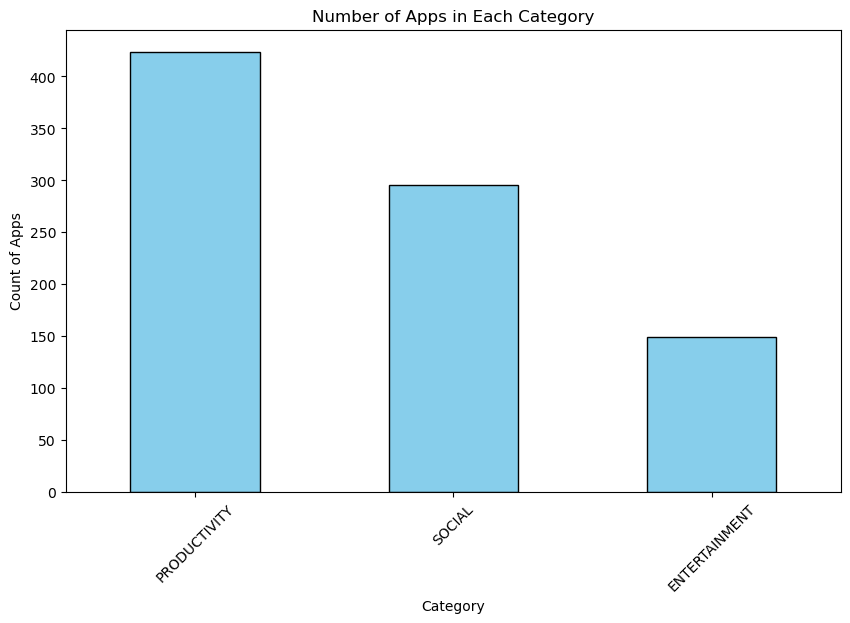

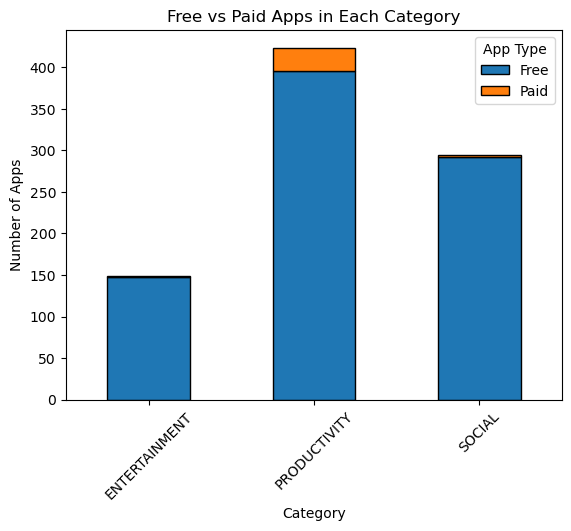

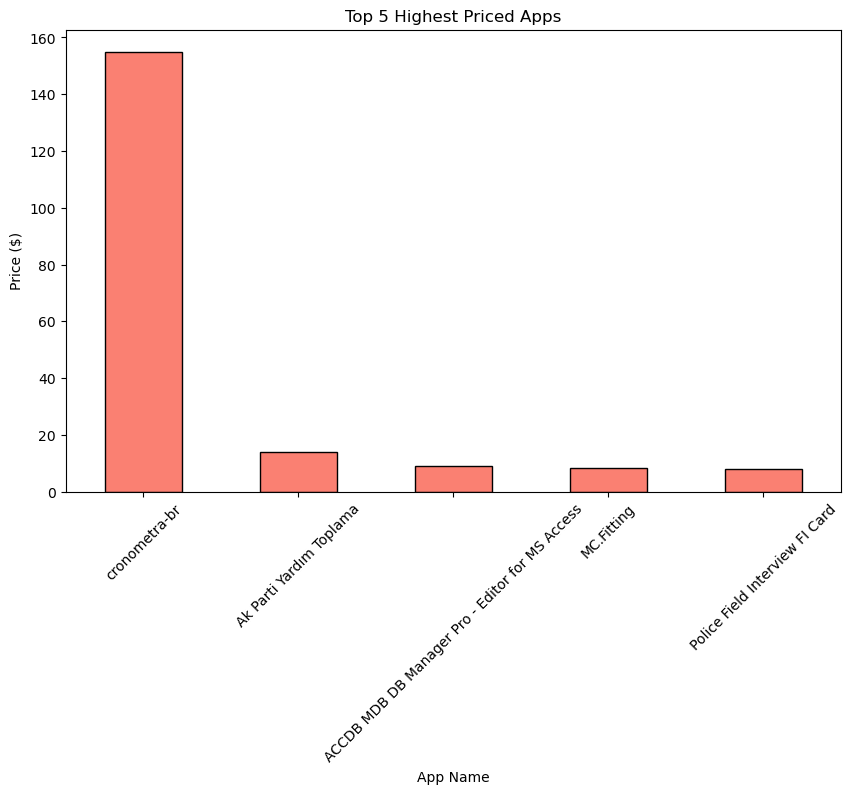

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('googleplaystoremaster.csv')

# Data cleaning
data['Price'] = pd.to_numeric(data['Price'].replace('[\\$,]', '', regex=True), errors='coerce')
filtered_data = data[data['Category'].isin(['ENTERTAINMENT', 'SOCIAL', 'PRODUCTIVITY'])]

# 1. Count of apps in each category
category_counts = filtered_data['Category'].value_counts()
display(category_counts)

# 2. Free and paid apps in each category
free_paid_counts = filtered_data.groupby(['Category', 'Type']).size().unstack(fill_value=0)
display(free_paid_counts)

# 3. Highest and lowest priced apps in each category
highest_priced_apps = filtered_data.loc[filtered_data.groupby('Category')['Price'].idxmax()][['App', 'Category', 'Price']]
lowest_priced_apps = filtered_data.loc[filtered_data.groupby('Category')['Price'].idxmin()][['App', 'Category', 'Price']]
display(highest_priced_apps)
display(lowest_priced_apps)

# 4. Top 5 highest priced apps
top_5_highest_priced_apps = filtered_data[['App', 'Category', 'Price']].sort_values(by='Price', ascending=False).head(5)
display(top_5_highest_priced_apps)

# Visualization 1: Bar chart of app counts in each category
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Count of Apps')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Stacked bar chart for free and paid apps in each category
free_paid_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Free vs Paid Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.legend(title='App Type')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Bar chart showing the top 5 highest-priced apps with their prices
plt.figure(figsize=(10, 6))
top_5_highest_priced_apps.set_index('App')['Price'].plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 5 Highest Priced Apps')
plt.xlabel('App Name')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()
